In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, roc_auc_score, roc_curve, auc, brier_score_loss

In [2]:
df = pd.read_csv('/home/ubuntu/MIMICmaterialized/oasis.csv')

In [3]:
# keep only adult cases
df_adult = df.loc[df['icustay_age_group'] == 'adult']

# DECIDE ABOUT DROPPING NULL VALUES AND INSERT HERE
df_adult_dropped = df_adult.dropna().copy()

In [4]:
# create dataframe based on computed scores
df_scores = df_adult_dropped[['oasis_prob','icustay_id', 'oasis',\
                              'age_score', 'preiculos_score', 'gcs_score', 'heartrate_score', \
                              'meanbp_score', 'resprate_score', 'temp_score','urineoutput_score', \
                              'mechvent_score','electivesurgery_score', \
                              'icustay_expire_flag']].copy()

In [5]:
df_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48785 entries, 0 to 61531
Data columns (total 14 columns):
oasis_prob               48785 non-null float64
icustay_id               48785 non-null int64
oasis                    48785 non-null int64
age_score                48785 non-null int64
preiculos_score          48785 non-null int64
gcs_score                48785 non-null float64
heartrate_score          48785 non-null float64
meanbp_score             48785 non-null float64
resprate_score           48785 non-null float64
temp_score               48785 non-null float64
urineoutput_score        48785 non-null float64
mechvent_score           48785 non-null int64
electivesurgery_score    48785 non-null int64
icustay_expire_flag      48785 non-null int64
dtypes: float64(7), int64(7)
memory usage: 5.6 MB


Accuracy score: 0.926
AUROC: 0.864
SMR: 3.3
Brier Score: 0.0578
Brier Score [SKLEARN]: 0.0578
Brier Score [IND]: 0.0681


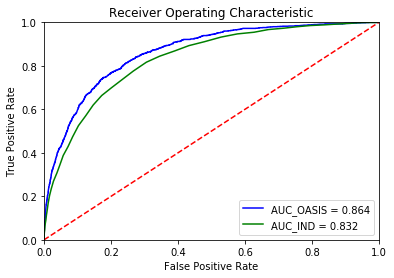

In [8]:


# create target variable
y = df_scores['icustay_expire_flag'].copy()

# create X variable
X = df_scores[['age_score', 'preiculos_score', 'gcs_score', 'heartrate_score', \
                              'meanbp_score', 'resprate_score', 'temp_score','urineoutput_score', \
                              'mechvent_score','electivesurgery_score']].copy()


# train-test split	
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y)

# Train and fit model                                                   
rf = GradientBoostingClassifier(random_state=0, learning_rate= 0.01, \
                                max_features='sqrt', max_leaf_nodes=12, 
                                n_estimators=1250 )

y_ind_prob = df_scores.loc[X_test.index]

rf.fit(X_train, y_train)

# Test Prediction
pred = rf.predict(X_test)
print('Accuracy score: {:.3}'.format(rf.score(X_test, y_test)))

# Get predicted probabilites 	
y_predict_proba = rf.predict_proba(X_test)

# Get predicted probabilites of 1 (Death)
y_proba = y_predict_proba[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test, y_proba)))

# Calculate Standard Mortality Rate (SMR) 
SMR = sum(y_test)/sum(pred)
print('SMR: {:.3}'.format(SMR))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference = y_proba - y_test
squared = np.square(difference)
Brier = np.mean(squared)

print('Brier Score: {:.3}'.format(Brier))
print('Brier Score [SKLEARN]: {:.3}'.format(brier_score_loss(y_test, y_proba)))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))
print('Brier Score [IND]: {:.3}'.format(np.mean(np.square(y_ind_prob['oasis_prob'] - y_test))))


# calculate the fpr and tpr for all thresholds of the classification
# probs = model.predict_proba(X_test)
# preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Industry standard 
fpr_IND, tpr_IND, threshold = roc_curve(y_test, y_ind_prob['oasis_prob'])
roc_auc_IND = auc(fpr_IND, tpr_IND)

# Plot ROC curves

plt.title('Receiver Operating Characteristic')

plt.plot(fpr, tpr, 'b', label = 'AUC_OASIS = %0.3f' % roc_auc)
plt.plot(fpr_IND, tpr_IND, 'g', label = 'AUC_IND = %0.3f' % roc_auc_IND)


plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy score: 0.927
AUROC: 0.864
SMR: 3.37
Brier Score: 0.0578
Brier Score [SKLEARN]: 0.0578
Brier Score [IND]: 0.0681


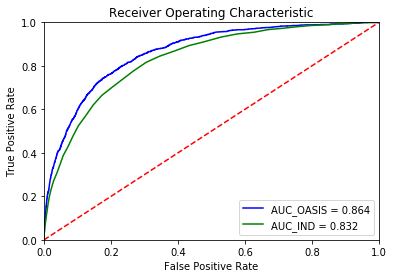

In [9]:


# create target variable
y = df_scores['icustay_expire_flag'].copy()

# create X variable
X = df_scores[['age_score', 'preiculos_score', 'gcs_score', 'heartrate_score', \
                              'meanbp_score', 'resprate_score', 'temp_score','urineoutput_score', \
                              'mechvent_score','electivesurgery_score']].copy()


# train-test split	
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y)

# Train and fit model                                                   
rf = GradientBoostingClassifier(random_state=0, learning_rate= 0.05, \
                                max_features='sqrt', max_leaf_nodes=4, 
                                n_estimators=1000 )

y_ind_prob = df_scores.loc[X_test.index]

rf.fit(X_train, y_train)

# Test Prediction
pred = rf.predict(X_test)
print('Accuracy score: {:.3}'.format(rf.score(X_test, y_test)))

# Get predicted probabilites 	
y_predict_proba = rf.predict_proba(X_test)

# Get predicted probabilites of 1 (Death)
y_proba = y_predict_proba[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test, y_proba)))

# Calculate Standard Mortality Rate (SMR) 
SMR = sum(y_test)/sum(pred)
print('SMR: {:.3}'.format(SMR))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference = y_proba - y_test
squared = np.square(difference)
Brier = np.mean(squared)

print('Brier Score: {:.3}'.format(Brier))
print('Brier Score [SKLEARN]: {:.3}'.format(brier_score_loss(y_test, y_proba)))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))
print('Brier Score [IND]: {:.3}'.format(np.mean(np.square(y_ind_prob['oasis_prob'] - y_test))))


# calculate the fpr and tpr for all thresholds of the classification
# probs = model.predict_proba(X_test)
# preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Industry standard 
fpr_IND, tpr_IND, threshold = roc_curve(y_test, y_ind_prob['oasis_prob'])
roc_auc_IND = auc(fpr_IND, tpr_IND)

# Plot ROC curves

plt.title('Receiver Operating Characteristic')

plt.plot(fpr, tpr, 'b', label = 'AUC_OASIS = %0.3f' % roc_auc)
plt.plot(fpr_IND, tpr_IND, 'g', label = 'AUC_IND = %0.3f' % roc_auc_IND)


plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy score: 0.926
AUROC: 0.864
SMR: 3.26
Brier Score: 0.0578
Brier Score [SKLEARN]: 0.0578
Brier Score [IND]: 0.0681


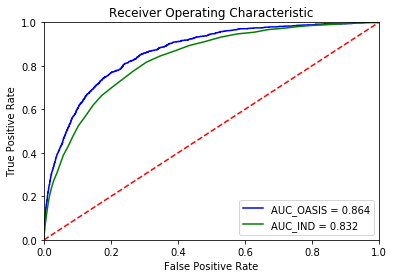

In [18]:


# create target variable
y = df_scores['icustay_expire_flag'].copy()

# create X variable
X = df_scores[['age_score', 'preiculos_score', 'gcs_score', 'heartrate_score', \
                              'meanbp_score', 'resprate_score', 'temp_score','urineoutput_score', \
                              'mechvent_score','electivesurgery_score']].copy()


# train-test split	
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y)

# Train and fit model                                                   
rf = GradientBoostingClassifier(random_state=0, learning_rate= 0.01, \
                                max_features='sqrt', max_leaf_nodes=9, 
                                n_estimators=1900 )

y_ind_prob = df_scores.loc[X_test.index]

rf.fit(X_train, y_train)

# Test Prediction
pred = rf.predict(X_test)
print('Accuracy score: {:.3}'.format(rf.score(X_test, y_test)))

# Get predicted probabilites 	
y_predict_proba = rf.predict_proba(X_test)

# Get predicted probabilites of 1 (Death)
y_proba = y_predict_proba[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test, y_proba)))

# Calculate Standard Mortality Rate (SMR) 
SMR = sum(y_test)/sum(pred)
print('SMR: {:.3}'.format(SMR))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference = y_proba - y_test
squared = np.square(difference)
Brier = np.mean(squared)

print('Brier Score: {:.3}'.format(Brier))
print('Brier Score [SKLEARN]: {:.3}'.format(brier_score_loss(y_test, y_proba)))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))
print('Brier Score [IND]: {:.3}'.format(np.mean(np.square(y_ind_prob['oasis_prob'] - y_test))))


# calculate the fpr and tpr for all thresholds of the classification
# probs = model.predict_proba(X_test)
# preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Industry standard 
fpr_IND, tpr_IND, threshold = roc_curve(y_test, y_ind_prob['oasis_prob'])
roc_auc_IND = auc(fpr_IND, tpr_IND)

# Plot ROC curves

plt.title('Receiver Operating Characteristic')

plt.plot(fpr, tpr, 'b', label = 'AUC_OASIS = %0.3f' % roc_auc)
plt.plot(fpr_IND, tpr_IND, 'g', label = 'AUC_IND = %0.3f' % roc_auc_IND)


plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy score: 0.926
AUROC: 0.864
SMR: 3.33
Brier Score: 0.0578
Brier Score [SKLEARN]: 0.0578
Brier Score [IND]: 0.0681


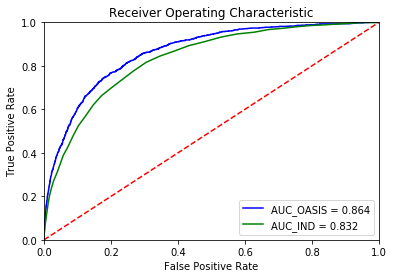

In [11]:


# create target variable
y = df_scores['icustay_expire_flag'].copy()

# create X variable
X = df_scores[['age_score', 'preiculos_score', 'gcs_score', 'heartrate_score', \
                              'meanbp_score', 'resprate_score', 'temp_score','urineoutput_score', \
                              'mechvent_score','electivesurgery_score']].copy()


# train-test split	
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y)

# Train and fit model                                                   
rf = GradientBoostingClassifier(random_state=0, learning_rate= 0.01, \
                                max_features='sqrt', max_leaf_nodes=9, 
                                n_estimators=1600 )

y_ind_prob = df_scores.loc[X_test.index]

rf.fit(X_train, y_train)

# Test Prediction
pred = rf.predict(X_test)
print('Accuracy score: {:.3}'.format(rf.score(X_test, y_test)))

# Get predicted probabilites 	
y_predict_proba = rf.predict_proba(X_test)

# Get predicted probabilites of 1 (Death)
y_proba = y_predict_proba[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test, y_proba)))

# Calculate Standard Mortality Rate (SMR) 
SMR = sum(y_test)/sum(pred)
print('SMR: {:.3}'.format(SMR))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference = y_proba - y_test
squared = np.square(difference)
Brier = np.mean(squared)

print('Brier Score: {:.3}'.format(Brier))
print('Brier Score [SKLEARN]: {:.3}'.format(brier_score_loss(y_test, y_proba)))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))
print('Brier Score [IND]: {:.3}'.format(np.mean(np.square(y_ind_prob['oasis_prob'] - y_test))))


# calculate the fpr and tpr for all thresholds of the classification
# probs = model.predict_proba(X_test)
# preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Industry standard 
fpr_IND, tpr_IND, threshold = roc_curve(y_test, y_ind_prob['oasis_prob'])
roc_auc_IND = auc(fpr_IND, tpr_IND)

# Plot ROC curves

plt.title('Receiver Operating Characteristic')

plt.plot(fpr, tpr, 'b', label = 'AUC_OASIS = %0.3f' % roc_auc)
plt.plot(fpr_IND, tpr_IND, 'g', label = 'AUC_IND = %0.3f' % roc_auc_IND)


plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy score: 0.926
AUROC: 0.864
SMR: 3.28
Brier Score: 0.0578
Brier Score [SKLEARN]: 0.0578
Brier Score [IND]: 0.0681


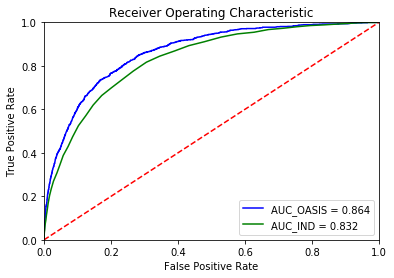

In [12]:


# create target variable
y = df_scores['icustay_expire_flag'].copy()

# create X variable
X = df_scores[['age_score', 'preiculos_score', 'gcs_score', 'heartrate_score', \
                              'meanbp_score', 'resprate_score', 'temp_score','urineoutput_score', \
                              'mechvent_score','electivesurgery_score']].copy()


# train-test split	
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y)

# Train and fit model                                                   
rf = GradientBoostingClassifier(random_state=0, learning_rate= 0.01, \
                                max_features='sqrt', max_leaf_nodes=9, \
                                max_depth=10, \
                                n_estimators=1900 )

y_ind_prob = df_scores.loc[X_test.index]

rf.fit(X_train, y_train)

# Test Prediction
pred = rf.predict(X_test)
print('Accuracy score: {:.3}'.format(rf.score(X_test, y_test)))

# Get predicted probabilites 	
y_predict_proba = rf.predict_proba(X_test)

# Get predicted probabilites of 1 (Death)
y_proba = y_predict_proba[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test, y_proba)))

# Calculate Standard Mortality Rate (SMR) 
SMR = sum(y_test)/sum(pred)
print('SMR: {:.3}'.format(SMR))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference = y_proba - y_test
squared = np.square(difference)
Brier = np.mean(squared)

print('Brier Score: {:.3}'.format(Brier))
print('Brier Score [SKLEARN]: {:.3}'.format(brier_score_loss(y_test, y_proba)))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))
print('Brier Score [IND]: {:.3}'.format(np.mean(np.square(y_ind_prob['oasis_prob'] - y_test))))


# calculate the fpr and tpr for all thresholds of the classification
# probs = model.predict_proba(X_test)
# preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Industry standard 
fpr_IND, tpr_IND, threshold = roc_curve(y_test, y_ind_prob['oasis_prob'])
roc_auc_IND = auc(fpr_IND, tpr_IND)

# Plot ROC curves

plt.title('Receiver Operating Characteristic')

plt.plot(fpr, tpr, 'b', label = 'AUC_OASIS = %0.3f' % roc_auc)
plt.plot(fpr_IND, tpr_IND, 'g', label = 'AUC_IND = %0.3f' % roc_auc_IND)


plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

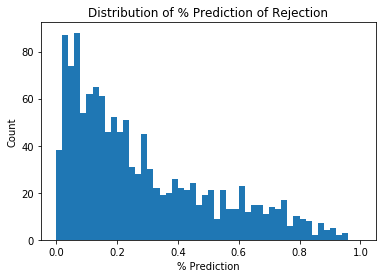

In [31]:
import matplotlib.pyplot as plt

plt.hist(y_proba[y_test==1],range=[0,1], bins=50)
plt.xlabel('% Prediction')
plt.ylabel('Count')
plt.title('Distribution of % Prediction of Rejection')
plt.show()


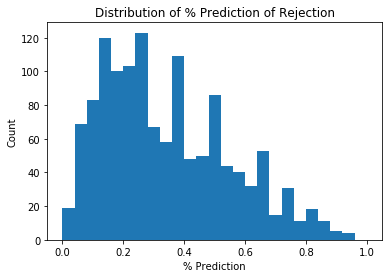

In [26]:
plt.hist(y_ind_prob['oasis_prob'][y_test==1],range=[0,1], bins=25)
plt.xlabel('% Prediction')
plt.ylabel('Count')
plt.title('Distribution of % Prediction of Rejection')
plt.show()

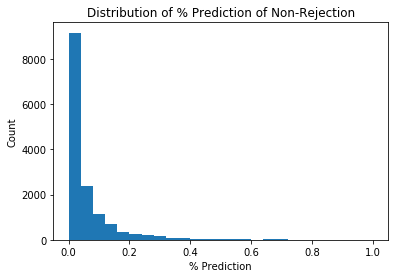

In [27]:
plt.hist(y_proba[y_test==0],range=[0,1], bins=25)
plt.xlabel('% Prediction')
plt.ylabel('Count')
plt.title('Distribution of % Prediction of Non-Rejection')
plt.show()


In [29]:
pd.crosstab(y_test, y_proba>0.5, rownames=['true'], colnames=['predict'])

predict,False,True
true,,
0,14656,145
1,1046,253


In [30]:
pd.crosstab(y_test, y_proba>0.1, rownames=['true'], colnames=['predict'])

predict,False,True
true,,
0,12229,2572
1,341,958


In [32]:
pd.crosstab(y_test, y_proba>0.2, rownames=['true'], colnames=['predict'])

predict,False,True
true,,
0,13739,1062
1,627,672
